In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Dry_Bean_Dataset.csv")
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [3]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.10,
                                                    random_state =0)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(13611, 16)
(12249, 16)
(1362, 16)


In [5]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [6]:
# tree.plot_tree(clf)

Accuracy Score        :  0.8986784140969163
Classification Report : 
               precision    recall  f1-score   support

    BARBUNYA       0.87      0.88      0.88       125
      BOMBAY       1.00      1.00      1.00        49
        CALI       0.91      0.90      0.90       182
    DERMASON       0.92      0.90      0.91       365
       HOROZ       0.93      0.95      0.94       189
       SEKER       0.91      0.95      0.93       198
        SIRA       0.82      0.81      0.82       254

    accuracy                           0.90      1362
   macro avg       0.91      0.91      0.91      1362
weighted avg       0.90      0.90      0.90      1362



<Axes: >

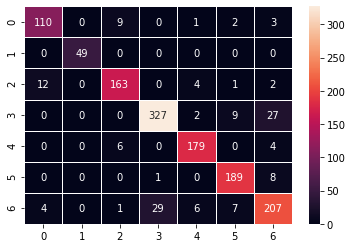

In [7]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
print("Accuracy Score        : ",accuracy_score(y_test, y_pred))
print("Classification Report : \n", classification_report(y_test, y_pred))
cfm=confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)

In [8]:
from sklearn.metrics import precision_score, recall_score
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')

precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')

print("Micro Precision:", precision_micro)
print("Micro Recall:", recall_micro)

print("Macro Precision:", precision_macro)
print("Macro Recall:", recall_macro)

Micro Precision: 0.8986784140969163
Micro Recall: 0.8986784140969163
Macro Precision: 0.9093204989642566
Macro Recall: 0.9125844054457088


In [9]:
# K folds cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, random_state=2, shuffle = True)

In [10]:
from sklearn. model_selection import cross_val_score
from numpy import mean, std
modelTree = tree.DecisionTreeClassifier()
scores = cross_val_score(modelTree,X_test, y_test, scoring="accuracy", cv=kf, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.873 (0.015)


In [11]:
# fine tune parameters for lr model
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ["best", "random"],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [i for i in range(1,5)]
} 


clf = tree.DecisionTreeClassifier()
gs_svm_result = GridSearchCV(clf, param_grid,cv=kf).fit(X_test, y_test)
# print(gs_svm_result.best_score_)

/Users/steph/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/steph/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/steph/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/steph/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/steph/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test pa

In [12]:
test = gs_svm_result.best_estimator_.score(X_test, y_test)
gs_svm_result.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'splitter': 'random'}

In [13]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=1, min_samples_split=2, splitter='best')
clf = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

Accuracy Score        :  0.8898678414096917
Classification Report : 
               precision    recall  f1-score   support

    BARBUNYA       0.71      0.90      0.79       125
      BOMBAY       1.00      1.00      1.00        49
        CALI       0.96      0.77      0.85       182
    DERMASON       0.89      0.95      0.92       365
       HOROZ       0.94      0.93      0.93       189
       SEKER       0.93      0.93      0.93       198
        SIRA       0.88      0.80      0.84       254

    accuracy                           0.89      1362
   macro avg       0.90      0.90      0.90      1362
weighted avg       0.90      0.89      0.89      1362



<Axes: >

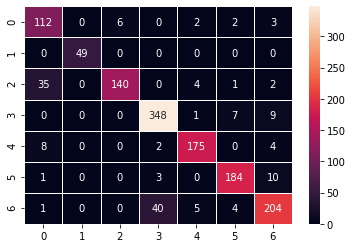

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
print("Accuracy Score        : ",accuracy_score(y_test, y_pred))
print("Classification Report : \n", classification_report(y_test, y_pred))
cfm=confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)

In [15]:
from sklearn.metrics import precision_score, recall_score
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_micro = recall_score(y_test, y_pred, average='micro')

precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')

print("Micro Precision:", precision_micro)
print("Micro Recall:", recall_micro)

print("Macro Precision:", precision_macro)
print("Macro Recall:", recall_macro)

Micro Precision: 0.8898678414096917
Micro Recall: 0.8898678414096917
Macro Precision: 0.9003154628713365
Macro Recall: 0.8967176983261548
